 # Aim
 Analyze data from experiment with beamsplitters RB with a single spectator state experiment. 
 
 h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\DualRail_BeamSplitters_withSingleSpec.csv

In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


In [8]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [9]:
ds_stor_man_swap.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.415,0.010,0.977143,0.488571,3000,2024-10-26 17:42:46.915401
1,M1-S2,520.925,0.010,1.130904,0.565452,5000,2024-10-26 17:43:09.376354
2,M1-S3,696.665,0.010,1.333910,0.666955,9000,2024-10-26 17:43:34.019332
3,M1-S4,875.845,0.010,1.254287,0.627144,9000,2024-10-26 17:43:51.867832
4,M1-S5,1053.395,0.010,1.973198,0.986599,7500,2024-10-26 17:44:14.975970
5,M1-S6,1245.160,0.010,1.595310,0.797655,13500,2024-10-26 17:44:34.143253
6,M1-S7,1423.040,0.010,1.685008,0.842504,13500,2024-10-26 17:44:51.587301
7,M1-S8,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3


In [10]:
# load BS data frame (without spectators)
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs = pd.read_csv(file_path)
df_bs

,Mode,file_list,name,fids_list,fids_post_list,fid,fid_err,fid_post,fid_post_err,Depth fit up to,...,ge_list,eg_list,ee_list,gg_list_err,ge_list_err,eg_list_err,ee_list_err,ebars_list,ebars_post_list,depth_fit_up_to
0,1,"[548, 549, 550, 551, 552, 553, 554, 555, 556, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.933563187108675, 0.92539176866761, 0.908718...","[0.994865836316126, 0.993013098261554, 0.99046...",0.996652,0.000072,0.998779,0.000169,2000,...,"[0.9085502306183065, 0.9057903676411931, 0.887...","[0.004686333863849433, 0.00637849709117257, 0....","[0.06175047902747567, 0.06822973424121748, 0.0...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0004359989629942819, 0.0006174559521902646,...","[0.0015981747296314585, 0.0018304495944191988,...","[0.0016098005294681022, 0.0018226997647139613,...","[0.0004799021448033312, 0.0006728531999346926,...",2000
1,2,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9356514245251336, 0.9242189803653471, 0.914...","[0.9950886744818882, 0.9935122956231536, 0.991...",0.997613,0.000013,0.999754,0.000101,2000,...,"[0.8957272139719534, 0.8840266115577843, 0.873...","[0.0044322282288122945, 0.005776719908511158, ...","[0.05991634724605409, 0.07000429972614167, 0.0...","[0.0022832745775030047, 0.0018772482133232158,...","[0.0022832745775030047, 0.0018772482133232158,...","[0.00043983346018930907, 0.0004906753514151476...","[0.0018721113801848717, 0.001540946897328571, ...","[0.0016098005294681022, 0.0018226997647139613,...","[0.00048243060740322136, 0.0005523446792671511...",2000
2,3,"[590, 591, 592, 593, 594, 595, 596, 597, 598, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.932848556683558, 0.9184909395360339, 0.9043...","[0.9953260202637892, 0.9926657260845021, 0.991...",0.997000,0.000019,0.999229,0.000145,2000,...,"[0.8890630812784109, 0.8752246533122903, 0.861...","[0.0041724998020788145, 0.006467488235228106, ...","[0.06297894351436314, 0.07504157222873784, 0.0...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0003559383392788671, 0.0005238370770952343,...","[0.001176226769595588, 0.001570598764562083, 0...","[0.0018364832264220945, 0.0014975954861458222,...","[0.00039949444035114164, 0.0005909073629860316...",2000
3,4,"[611, 612, 613, 614, 615, 616, 617, 618, 619, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9224996506107835, 0.8977564150549788, 0.877...","[0.9924848735561859, 0.9889322008290996, 0.985...",0.993877,0.000050,0.996009,0.000355,2000,...,"[0.8953524548427165, 0.8707604852155324, 0.853...","[0.006783837945321119, 0.00973645686574578, 0....","[0.07071651144389529, 0.0925071280792755, 0.10...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0005176444615874594, 0.0006221573958370889,...","[0.0016800866418539158, 0.0019553545429684908,...","[0.0018364832264220945, 0.0014975954861458222,...","[0.0005700234403086111, 0.0007143665655444077,...",2000
4,5,"[632, 633, 634, 635, 636, 637, 638, 639, 640, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.924224701154291, 0.8972516351072528, 0.8680...","[0.994061657262647, 0.9914303178857917, 0.9861...",0.993209,0.000068,0.997944,0.000094,2000,...,"[0.9077750642910327, 0.8827509904350767, 0.851...","[0.0054231752960300465, 0.007617899645197445, ...","[0.07035212354967885, 0.0951304652475498, 0.11...","[0.001587489521038847, 0.0023662620250462256, ...","[0.001587489521038847, 0.0023662620250462256, ...","[0.00041051773797976297, 0.0006694071490576667...","[0.0012095062061867597, 0.0021735478521388344,...","[0.0012115656976351553, 0.001564185678578712, ...","[0.00045023043163391213, 0.0007583637132156032...",2000
5,6,"[653, 654, 655, 656, 657, 658, 659, 660, 661, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.890094859149635, 0.8900864880228737

# Load semi-analyzed data from beamsplitter in presence of spectator experiment

In [14]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters_withSingleSpec.csv'
file_path = os.path.join(folder, file_name)
# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs_spec = pd.read_csv(file_path)
df_bs_spec

,target,spectator,file_list,name,fids_list,fids_post_list,depth_list
0,1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.910093526571017, 0.8954892874542445, 0.8512...","[0.9799832506787038, 0.9710116812063394, 0.933...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
1,1,3,"[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9222854589478902, 0.909096866749857, 0.8911...","[0.992736101084076, 0.9909399088476863, 0.9901...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
2,1,4,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9276039967171705, 0.9150756288711042, 0.900...","[0.99271075837015, 0.9913995181913406, 0.98861...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
3,1,5,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9352654272919326, 0.9244829715535151, 0.908...","[0.9928800543427093, 0.9921072905953487, 0.990...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
4,1,6,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9204824035487779, 0.9138329812855798, 0.900...","[0.9880122050514494, 0.9885650752859831, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
5,1,7,"[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9327589684002223, 0.9215107080122759, 0.908...","[0.9927216181251227, 0.9921485442521224, 0.991...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
6,2,1,"[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9278776650426049, 0.925440975814047, 0.9167...","[0.9916436964152529, 0.9907233329806933, 0.989...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
7,2,3,"[98, 99, 100, 101, 102, 103, 104, 105, 106, 10...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9057421088234281, 0.8822340900901485, 0.847...","[0.9735317841050743, 0.9574914777165434, 0.925...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
8,2,4,"[112, 113, 114, 115, 116, 117, 118, 119, 120, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9298086718474624, 0.9211016305086126, 0.911...","[0.9901146062096049, 0.9895436204484327, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."
9,2,5,"[126, 127, 128, 129, 130, 131, 132, 133, 134, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9336954152085782, 0.9296354107338302, 0.918...","[0.9912287415956634, 0.990662039611712, 0.9893...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,..."


# Comparing with original (no spectator) case 

In [167]:
mode_no = 1
# find all the rows with the target mode
df_target = df_bs_spec[df_bs_spec['target'] == mode_no]
# print(df_target) 

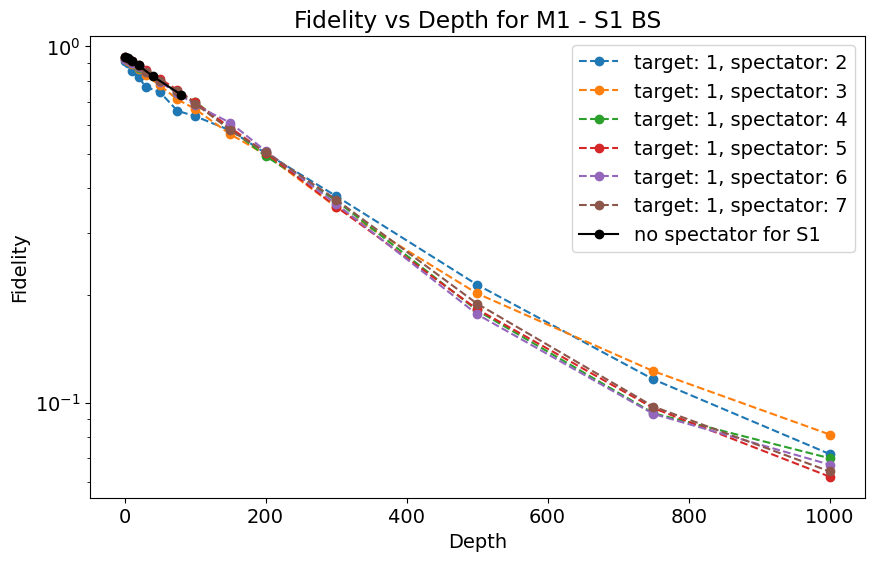

In [168]:
import ast 

end_idx = None
end_idx_bs = -10 #None
# df_bs_target = df_bs[df_bs['Mode'] == mode_no]
# plt.plot(ast.literal_eval(df_bs_target['depth_list'][0])[:end_idx_bs], ast.literal_eval(df_bs_target['fids_list'][0])[:end_idx_bs] ,'-o', label = 'no spectator for S' + str(mode_no))
  
  
for idx in range(len(df_target)): 
    depth_list = ast.literal_eval(df_target['depth_list'].iloc[idx])
    plt.plot(depth_list[:end_idx], ast.literal_eval(df_target['fids_list'].iloc[idx])[:end_idx], '--o', label = 'target: ' + str(df_target['target'].iloc[idx]) + ', spectator: ' + str(df_target['spectator'].iloc[idx]))
df_bs_target = df_bs[df_bs['Mode'] == mode_no]
plt.plot(ast.literal_eval(df_bs_target['depth_list'].iloc[0])[:end_idx_bs], ast.literal_eval(df_bs_target['fids_list'].iloc[0])[:end_idx_bs] ,'-o', color = 'black', label = 'no spectator for S' + str(mode_no))
    
plt.yscale('log')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Depth for M1 - S' + str(mode_no) +' BS')
plt.show()

## Using exponential fitting 

In [161]:
alpha = 1/2 
target_mode = mode_no 
bs_time = (ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1-S' + str(target_mode)]['h_pi (mus)'].values[0] +0.03) * 4/3
# get fidelity without spectators 
df_bs_target = df_bs[df_bs['Mode'] == target_mode]
F0 = df_bs_target['fid'].iloc[0] # original fidelity



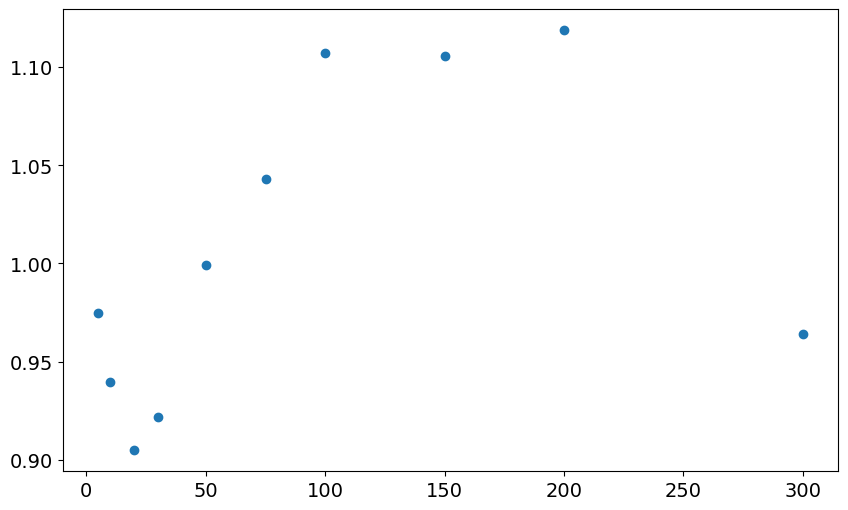

In [164]:
# # decay constant of all modes 
mode_kappas = 1/np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]) #* 2 * np.pi
specs_decay_during_gate = np.exp(-1 * bs_time * mode_kappas) # This is the A = e^-bs_kappa   




spectator_mode = 6
idx = spectator_mode - 1
row = df_target.loc[(df_target['target'] == target_mode) & (df_target['spectator'] == spectator_mode)]

depth_list = ast.literal_eval(row['depth_list'].iloc[0])
# now we fit 
spec_decay_during_gate = specs_decay_during_gate[idx] # This is the A = e^-kappa 


xlist = alpha * np.array([np.sum([spec_decay_during_gate**idx for idx in range(1, depth + 1)]) for depth in depth_list])
ylist = ast.literal_eval(row['fids_list'].iloc[0])
y_ref_list = ast.literal_eval(df_bs_target['fids_list'].iloc[0])

# normalize the data
norm_y_list = []
for idx in range(len(ylist)):
    norm_y_list.append(ylist[idx] / y_ref_list[idx])

# plot the data 
start_idx = 1
end_idx = -1
plt.plot(depth_list[start_idx: end_idx], norm_y_list[start_idx: end_idx], 'o', label = 'Data')


decay constant: -0.28137356169725797 error: -inf


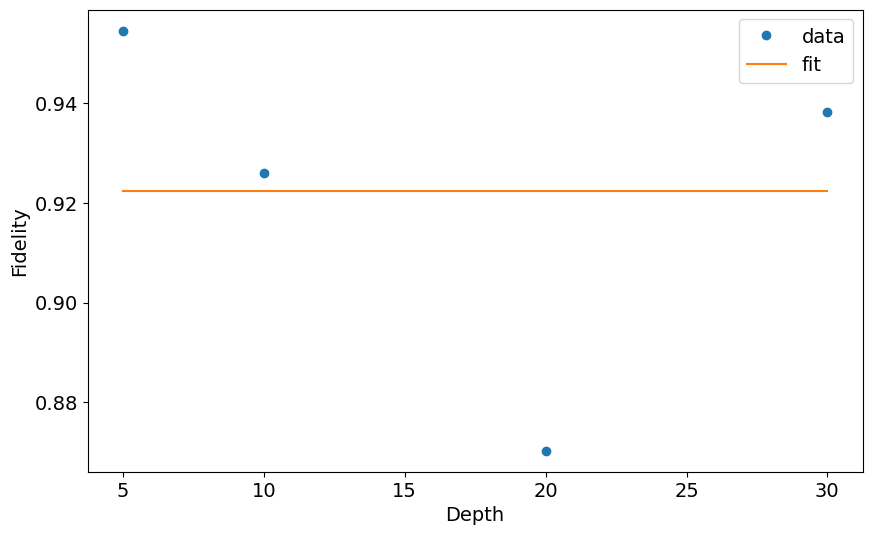

In [107]:
xlist_ = xlist[start_idx: end_idx]
ylist_ = norm_y_list[start_idx: end_idx]
depth_list_ = depth_list[start_idx: end_idx]

p, pcov = fitter.fitexp(xlist_, ylist_, fitparams=None)
plt.plot(depth_list_, ylist_, 'o', label='data')
plt.plot(depth_list_, fitter.expfunc(xlist_, *p), label='fit')
plt.xlabel('Depth')
plt.ylabel('Fidelity')
plt.legend()

decay_constant = p[3]
decay_constant_err = np.sqrt(np.diag(pcov))[3]
print('decay constant:', 1/decay_constant, 'error:', decay_constant_err/decay_constant )

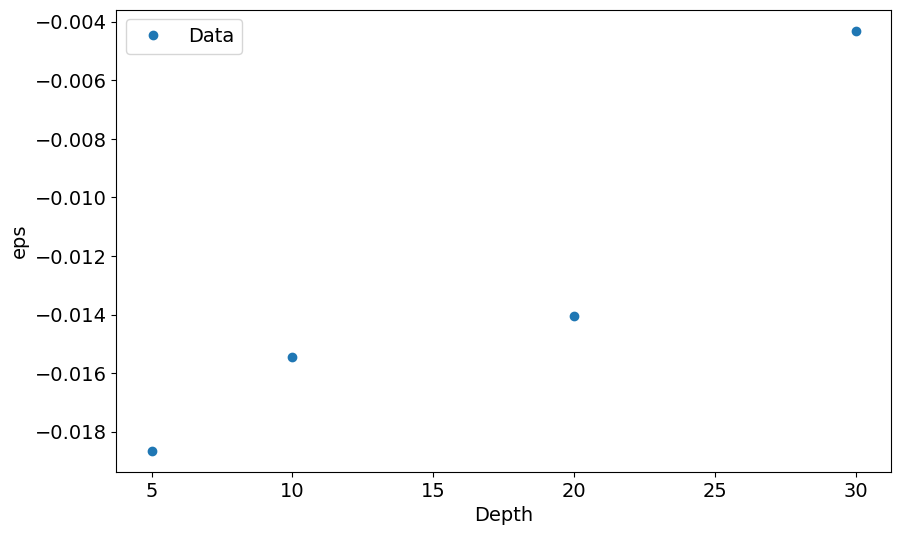

In [108]:
eps_list_ = np.log(ylist_) / xlist_
plt.plot(depth_list_, eps_list_, 'o', label = 'Data')
plt.ylabel('eps')
plt.xlabel('Depth')
plt.legend()

In [113]:
F0 = df_bs_target['fid'].iloc[0] # original fidelity
F1 = (min(eps_list_ ) + 1) * F0
print('F1:', F1)

F1: 0.9790050050810731


In [112]:
df_bs_target['fid']

1    0.997613
Name: fid, dtype: float64

## Automating above analysis

target mode: 1
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7
target mode: 2
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7
target mode: 3
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7
target mode: 4
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7
target mode: 5
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7
target mode: 6
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7
target mode: 7
spectator mode: 1
spectator mode: 2
spectator mode: 3
spectator mode: 4
spectator mode: 5
spectator mode: 6
spectator mode: 7


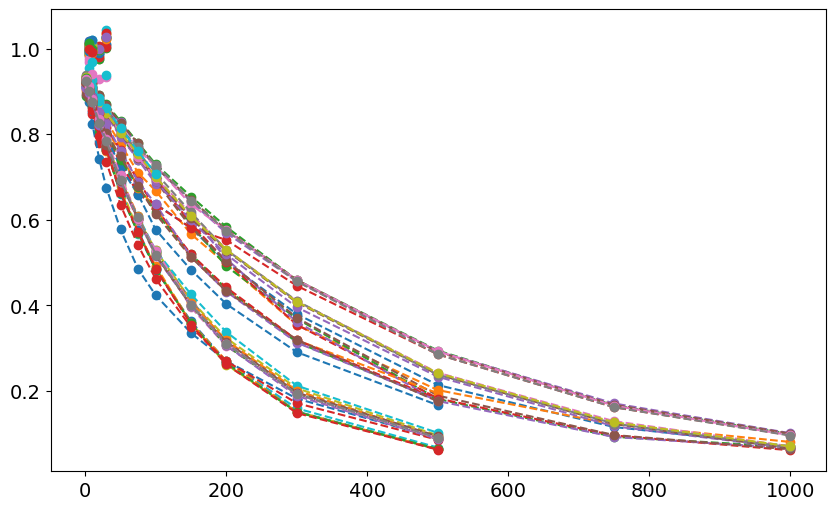

In [128]:
eps_mat = np.zeros((7, 7))
mode_list = [1, 2, 3, 4, 5, 6, 7]


for t_idx, target_mode in enumerate(mode_list):
    print('target mode:', target_mode)

    # from spec dataframe, get the rows with the target mode
    df_target = df_bs_spec[df_bs_spec['target'] == target_mode]

    end_idx = None
    end_idx_bs = -2 #None
    # df_bs_target = df_bs[df_bs['Mode'] == mode_no]
    # plt.plot(ast.literal_eval(df_bs_target['depth_list'][0])[:end_idx_bs], ast.literal_eval(df_bs_target['fids_list'][0])[:end_idx_bs] ,'-o', label = 'no spectator for S' + str(mode_no))
    
    
    for idx in range(len(df_target)): 
        depth_list = ast.literal_eval(df_target['depth_list'].iloc[idx])
        plt.plot(depth_list[:end_idx], ast.literal_eval(df_target['fids_list'].iloc[idx])[:end_idx], '--o', label = 'target: ' + str(df_target['target'].iloc[idx]) + ', spectator: ' + str(df_target['spectator'].iloc[idx]))
    df_bs_target = df_bs[df_bs['Mode'] == target_mode]

    alpha = 1/2 
    bs_time = (ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1-S' + str(target_mode)]['h_pi (mus)'].values[0] +0.03) * 4/3
    # get fidelity without spectators 
    F0 = df_bs_target['fid'].iloc[0] # original fidelity
    mode_kappas = 1/np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]) #* 2 * np.pi
    specs_decay_during_gate = np.exp(-1 * bs_time * mode_kappas) # This is the A = e^-bs_kappa   




    

    # choose a specific spectator mode
    for s_idx, spectator_mode in enumerate(mode_list): 
        print('spectator mode:', spectator_mode)
        if spectator_mode != target_mode:
        
            spec_idx = spectator_mode - 1
            row = df_target.loc[(df_target['target'] == target_mode) & (df_target['spectator'] == spectator_mode)]

            # print(df_target)
            depth_list = ast.literal_eval(row['depth_list'].iloc[0])
            # now we fit 
            spec_decay_during_gate = specs_decay_during_gate[spec_idx] # This is the A = e^-kappa 


            xlist = alpha * np.array([np.sum([spec_decay_during_gate**idx for idx in range(1, depth + 1)]) for depth in depth_list])
            ylist = ast.literal_eval(row['fids_list'].iloc[0])
            y_ref_list = ast.literal_eval(df_bs_target['fids_list'].iloc[0])

            # normalize the data
            norm_y_list = []
            for idx in range(len(ylist)):
                norm_y_list.append(ylist[idx] / y_ref_list[idx])

            # plot the data 
            start_idx = 1
            end_idx = -9
            plt.plot(depth_list[start_idx: end_idx], norm_y_list[start_idx: end_idx], 'o', label = 'Data')

            # choose only first few depths 
            xlist_ = xlist[start_idx: end_idx]
            ylist_ = norm_y_list[start_idx: end_idx]
            depth_list_ = depth_list[start_idx: end_idx]

            # find epislon for first few depths
            eps_list_ = np.log(ylist_) / xlist_

            if min(eps_list_) < 0:
                eps_mat[t_idx, s_idx] = abs(min(eps_list_))

            # figure out F1
            # F0 = df_bs_target['fid'].iloc[0] # original fidelity
            # F1 =  (min(eps_list_ ) + 1) * F0
            # if 
            # eps_mat[t_idx, s_idx] = min(eps_list)

        
        

        


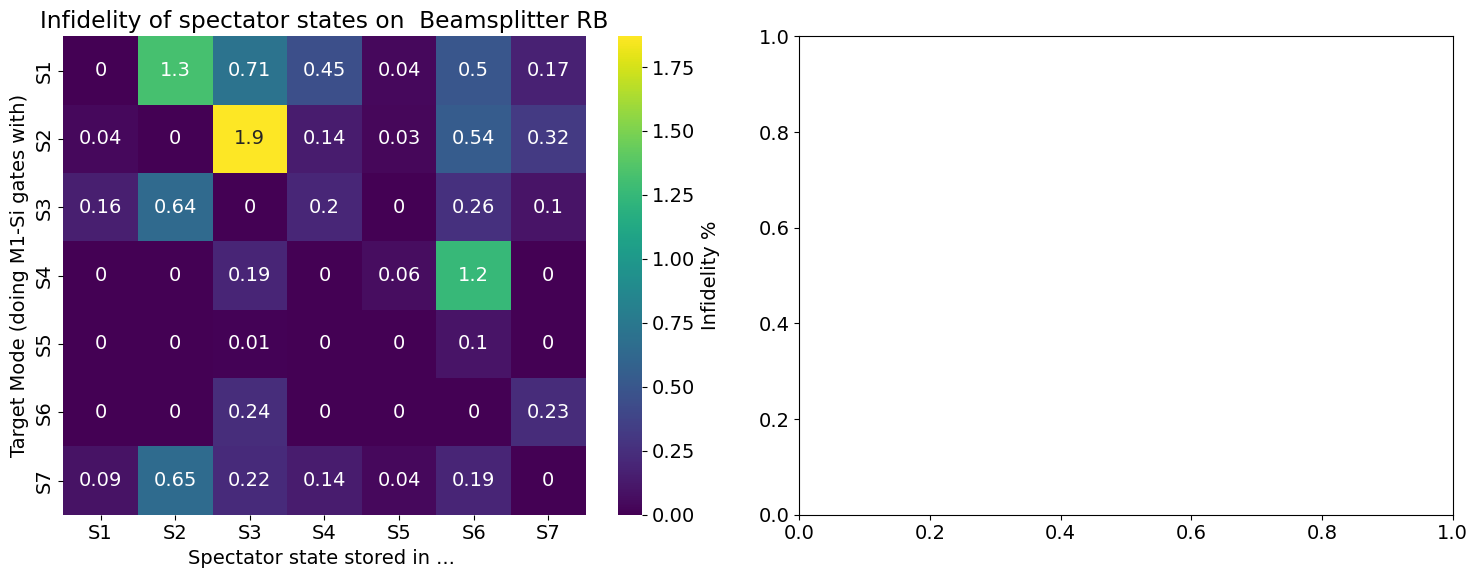

In [159]:
import seaborn as sns
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot t2s_mat
sns.heatmap(np.round(eps_mat * 100, 2), ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Infidelity %'})
ax1.set_title('Infidelity of spectator states on  Beamsplitter RB')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator state stored in ... ')
ax1.set_ylabel('Target Mode (doing M1-Si gates with)')

# Plot t2_errs_mat
# sns.heatmap(np.round(t2_errs_mat * 1e-3, 2), ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'T2 (ms)'})
# ax2.set_title('T2 Errors Matrix')
# ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
# ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])

# Display the plots
plt.tight_layout()
plt.show()


decay constant: 0.11642928890033165 error: 36.533014337403046


C:\_Lib\python\multimode_expts\experiments\fitting.py:55: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


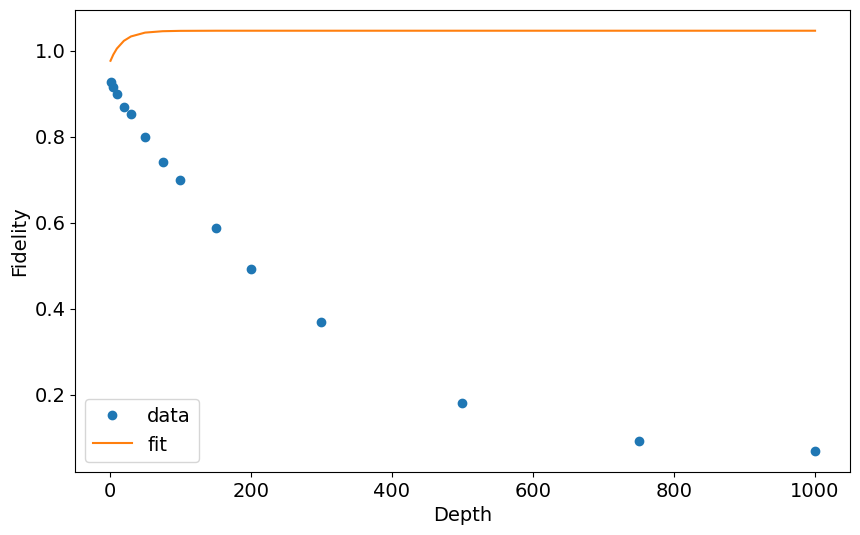

In [53]:
# fit the data  (norm y list )
p, pcov = fitter.fitexp(xlist, norm_y_list, fitparams=None)
plt.plot(depth_list, ylist, 'o', label='data')
plt.plot(depth_list, fitter.expfunc(xlist, *p), label='fit')
plt.xlabel('Depth')
plt.ylabel('Fidelity')
plt.legend()

decay_constant = p[3]
decay_constant_err = np.sqrt(np.diag(pcov))[3]
print('decay constant:', 1/decay_constant, 'error:', decay_constant_err)
#plt.yscale('log')

In [36]:
ylist

[0.910093526571017,
 0.8954892874542445,
 0.8512694980818458,
 0.8205104159744593,
 0.7690723933213022,
 0.7446217134544536,
 0.6592477089224109,
 0.6368837325715404,
 0.5808203820250013,
 0.5015146280088743,
 0.38000352136489407,
 0.21420834950834394,
 0.11616771509724252,
 0.07169578964910447]